In [1]:
import pandas as pd
import csv
import re
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('gtest.csv')

In [2]:
df.head()

,platform,account_id,id,created_time,text_original,text_additional,likes_count,shares_count,comments_count,views_count
0,Instagram,59141296785,C_00PPctR-o,2024-09-12 17:20:36.000000 +00:00,NaN,NaN,222.0,NaN,34.0,NaN
1,Instagram,60554087008,C_00W8KttVv,2024-09-12 17:21:27.000000 +00:00,Câ€™Ã¨ un gruppo sulla parola di Dio sulla mia...,NaN,391.0,NaN,37.0,NaN
2,Instagram,62605500679,C_026U_t3We,2024-09-12 17:43:38.000000 +00:00,ð’ð®ð¥ ð¦ð¢ð¨ ð©ð«ð¨ðŸð¢...,NaN,9.0,NaN,3.0,NaN
3,Instagram,58741537308,C_05B3hCYQn,2024-09-12 18:02:08.000000 +00:00,#Monza\n#Padova\n#Lecce\n#Latina\n#paroladelsi...,NaN,78.0,NaN,15.0,NaN
4,Instagram,58741537308,C_0BfOLiqRS,2024-09-12 09:57:22.000000 +00:00,#Monza\n#Padova\n#Lecce\n#Latina\n#paroladelsi...,NaN,129.0,NaN,16.0,NaN


In [3]:
df['platform'] = df['platform'].str.replace('[^\x00-\x7F]+', '', regex=True)
known_platforms = ['TikTok', 'YouTube', 'Facebook', 'Instagram']
df = df[df['platform'].isin(known_platforms)]

columns_to_drop = ['account_id', 'id','text_additional']
df = df.drop(columns=columns_to_drop)

In [4]:
df['platform'].value_counts()

platform
Instagram    2500
TikTok       2500
Facebook     2500
YouTube      2500
Name: count, dtype: int64

In [5]:
print(df[['likes_count', 'shares_count', 'comments_count','views_count']].describe())

         likes_count  shares_count  comments_count   views_count
count    9951.000000   5000.000000     9908.000000  5.621000e+03
mean     1414.377851     79.232000      299.861122  1.797353e+04
std      5989.211037    979.564848     1259.439901  1.012492e+05
min         0.000000      0.000000        0.000000  3.000000e+00
25%       116.000000      3.000000       28.000000  1.539000e+03
50%       354.000000      9.000000       93.000000  3.704000e+03
75%       895.000000     43.000000      261.000000  8.535000e+03
max    188611.000000  47500.000000    80415.000000  3.500000e+06


In [6]:
df['text_original'] = df['text_original'].fillna(0).astype(str)
df['created_time'] = pd.to_datetime(df['created_time'], errors='coerce')


#numeric_columns = df.select_dtypes(include=['float64']).columns
#df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean()) 

In [22]:

df['hashtags'] = df['text_original'].apply(lambda x: re.findall(r'#([a-zA-Z0-9_]+)', x))
hashtags = df['hashtags'].explode()
top_hashtags = hashtags.value_counts().head(10)
print(top_hashtags)

hashtags
ges          1159
preghiera     878
modlitwa      627
b             535
Jezus         504
Dio           475
wiara         439
mi            433
jezus         367
B             344
Name: count, dtype: int64


In [8]:
df['hour'] = df['created_time'].dt.hour
hourly_activity = df['hour'].value_counts().sort_index()
print(hourly_activity)

df['date'] = df['created_time'].dt.date
posts_per_day = df.groupby('date').size()

hour
0      69
1      34
2      31
3     344
4     642
5     994
6     702
7     265
8     355
9     923
10    657
11    441
12    315
13    218
14    439
15    791
16    593
17    822
18    551
19    330
20    181
21    103
22     84
23    116
Name: count, dtype: int64


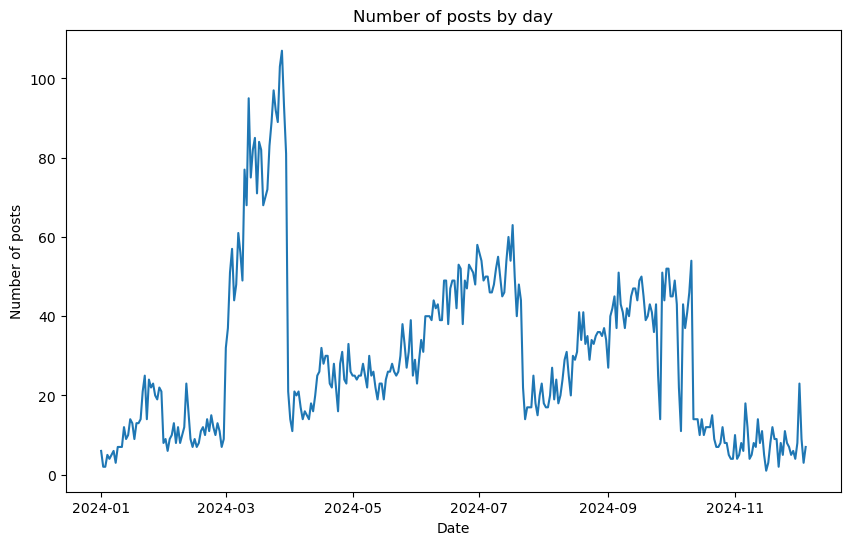

In [9]:
posts_per_day.plot(kind='line', figsize=(10, 6))
plt.title('Number of posts by day')
plt.xlabel('Date')
plt.ylabel('Number of posts')
plt.show()

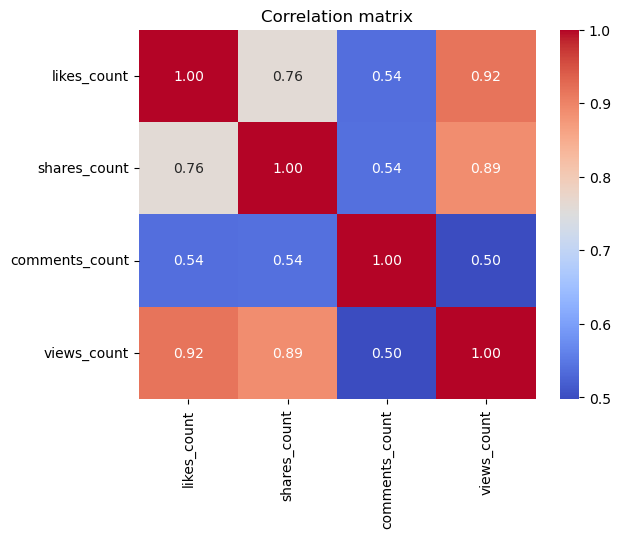

In [10]:
correlation = df[['likes_count', 'shares_count', 'comments_count', 'views_count']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation matrix')
plt.show()


In [11]:
platform_input = input("Enter platform: ")
if platform_input == "all":
    d_platform = df  
elif platform_input in ['TikTok', 'Facebook', 'YouTube', 'Instagram']:
    d_platform = df[df['platform'] == platform_input]  
    d_platform['platform'] = platform_input

Enter platform:  all


In [12]:
d_platform_stats = ['likes_count', 'comments_count', 'views_count']

for col in d_platform_stats:
    stats = d_platform[col].describe() 
    print(f"{col.capitalize()}:\n"
          f"Mean: {stats['mean']:.2f}\n"
          f"Maximum: {stats['max']:.0f}\n"
          f"Minimum: {stats['min']:.0f}\n"
          f"Median: {df[col].median():.0f}\n"
          f"Standard deviation: {stats['std']:.2f}\n")
    print("-" * 50)

Likes_count:
Mean: 1414.38
Maximum: 188611
Minimum: 0
Median: 354
Standard deviation: 5989.21

--------------------------------------------------
Comments_count:
Mean: 299.86
Maximum: 80415
Minimum: 0
Median: 93
Standard deviation: 1259.44

--------------------------------------------------
Views_count:
Mean: 17973.53
Maximum: 3500000
Minimum: 3
Median: 3704
Standard deviation: 101249.23

--------------------------------------------------


C:\Users\bunga\AppData\Local\Temp\ipykernel_5772\2850975419.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_data = d_platform.groupby(d_platform['created_time'].dt.to_period('M'))[['likes_count', 'views_count']].sum()


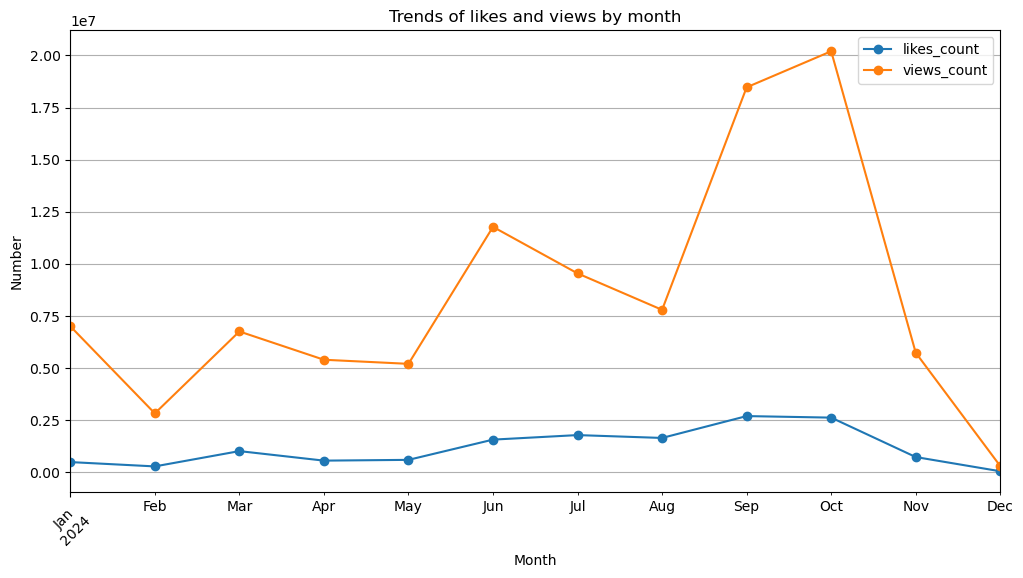

In [13]:
d_platform['created_time'] = pd.to_datetime(d_platform['created_time'])
monthly_data = d_platform.groupby(d_platform['created_time'].dt.to_period('M'))[['likes_count', 'views_count']].sum()

monthly_data.plot(figsize=(12, 6), marker='o')
plt.title("Trends of likes and views by month")
plt.xlabel("Month")
plt.ylabel("Number")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

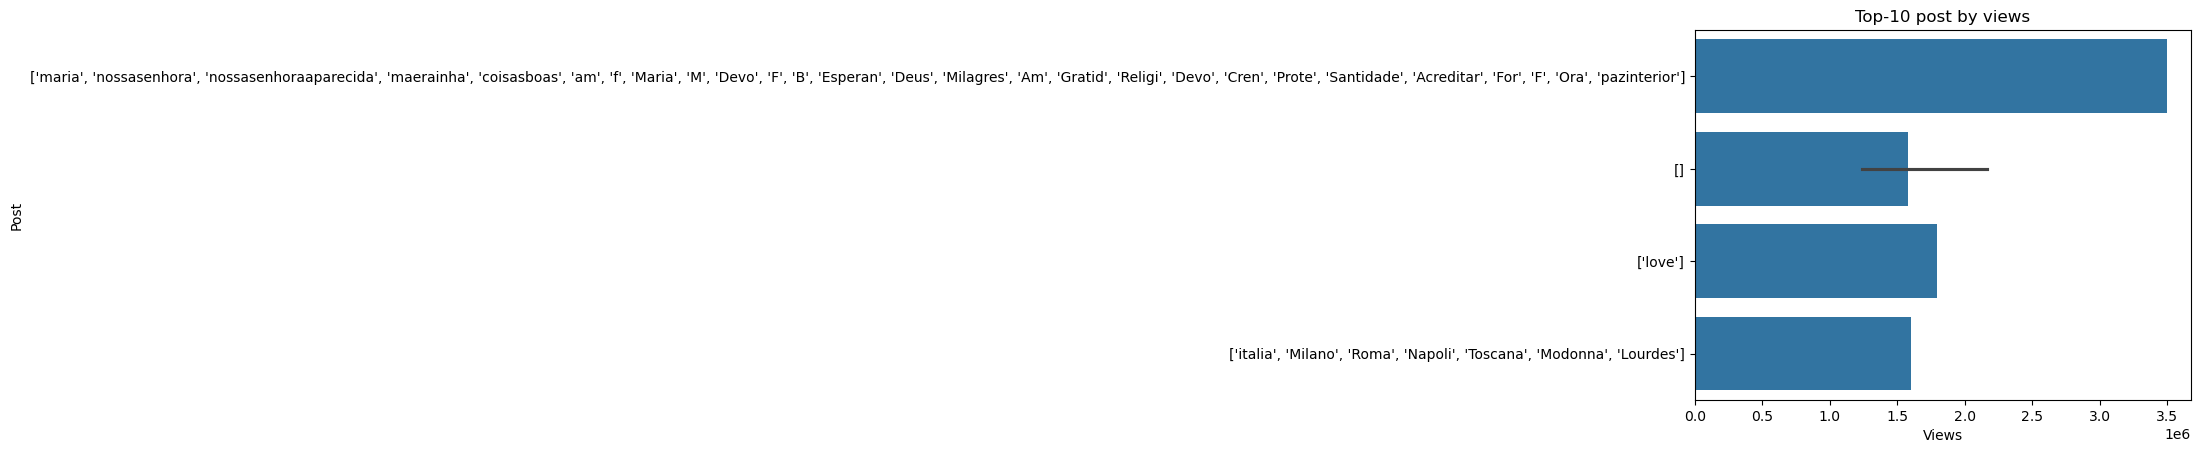

In [14]:
df['hashtags'] = df['hashtags'].astype(str)

top_posts = df.nlargest(10, 'views_count') 
sns.barplot(x='views_count', y='hashtags', data=top_posts, orient='h')
plt.title("Top-10 post by views")
plt.xlabel("Views")
plt.ylabel("Post")
plt.show()


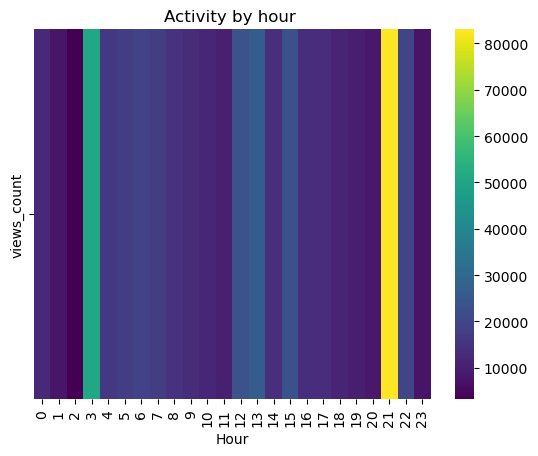

In [15]:
df['hour'] = df['created_time'].dt.hour
activity = df.groupby('hour')['views_count'].mean()


sns.heatmap(activity.to_frame().T, cmap='viridis', annot=False, cbar=True)
plt.title("Activity by hour ")
plt.xlabel("Hour")
plt.show()

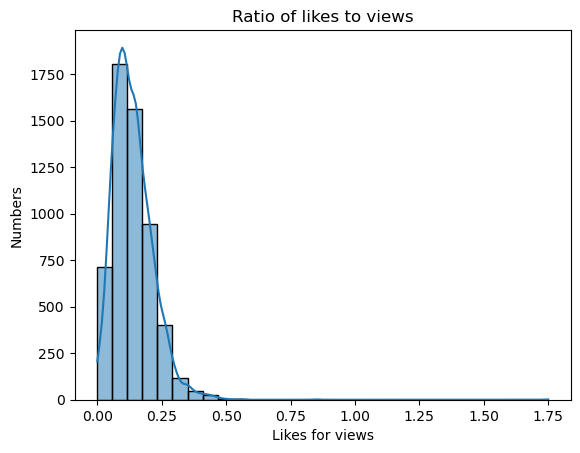

In [16]:
df['likes_to_comments'] = df['likes_count'] / (df['views_count'] + 1)  
sns.histplot(df['likes_to_comments'], kde=True, bins=30)
plt.title("Ratio of likes to views")
plt.xlabel("Likes for views")
plt.ylabel("Numbers")
plt.show()


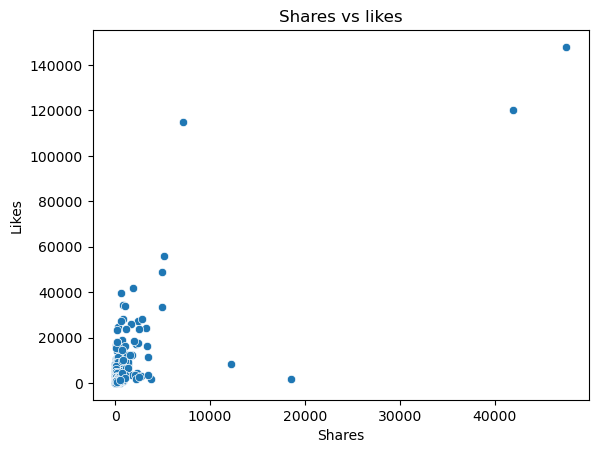

In [25]:
sns.scatterplot(x='shares_count', y='likes_count', data=df)
plt.title('Shares vs likes')
plt.xlabel('Shares')
plt.ylabel('Likes')
plt.show()

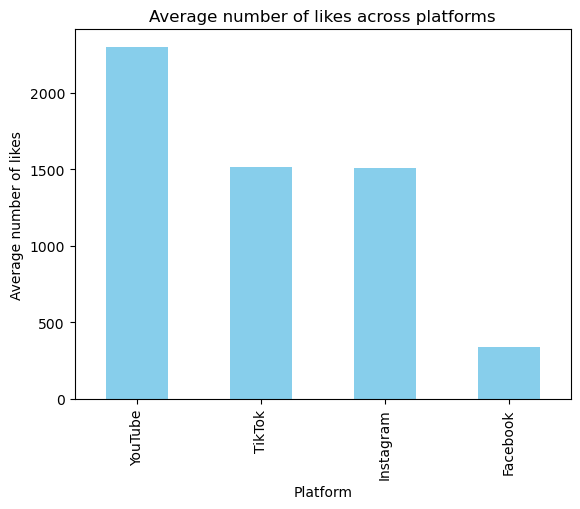

In [18]:
platform_avg_likes = df.groupby('platform')['likes_count'].mean().sort_values(ascending=False)
platform_avg_likes.plot(kind='bar', color='skyblue')
plt.title('Average number of likes across platforms')
plt.xlabel('Platform')
plt.ylabel('Average number of likes')
plt.show()

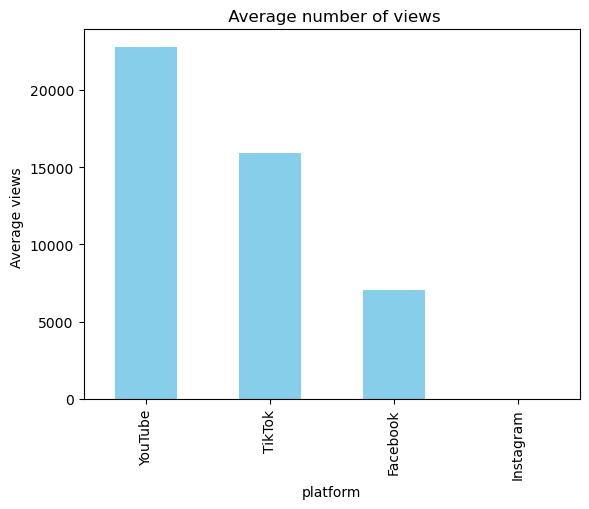

In [19]:
platform_avg_views = df.groupby('platform')['views_count'].mean().sort_values(ascending=False)
platform_avg_views.plot(kind='bar', color='skyblue')
plt.title(' Average number of views')
plt.xlabel('platform')
plt.ylabel('Average views ')
plt.show()

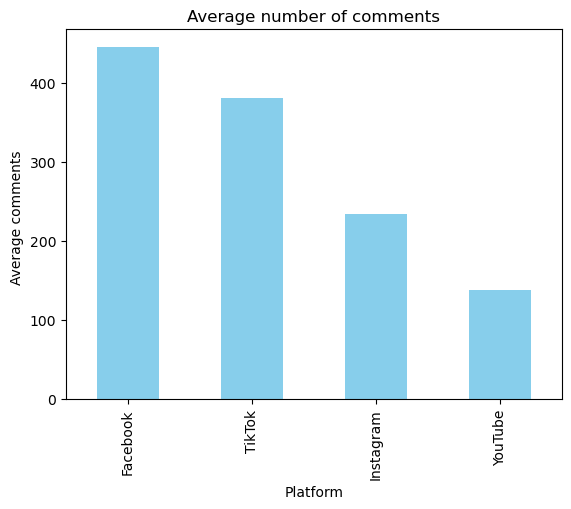

In [20]:
platform_avg_likes = df.groupby('platform')['comments_count'].mean().sort_values(ascending=False)
platform_avg_likes.plot(kind='bar', color='skyblue')
plt.title('Average number of comments')
plt.xlabel('Platform')
plt.ylabel('Average comments ')
plt.show()

In [21]:
df.to_csv('output.csv', index=False)